# Analysis of catering establishments in Moscow

# Table of Contents 

* [Introduction](#num1)
* [Data description](#num2)
* [1. Loading data](#num3)
* [2. Data preprocessing](#num4)
* [3. Exploratory data analysis](#num5)
* [4. Detailing the study: opening a coffee shop](#num6)
* [5. General conclusion](#num7)

<a id="num1"></a>
## Introduction

**Project Objective:** to prepare a study of the Moscow market, find interesting features and present the results obtained, which in the future will help in choosing a suitable location for investors.
 
**Objectives:**

1. Download data and learn general information;
2. Perform preprocessing of the data;
3. Perform data analysis;
4. To investigate in detail the possibility of opening a coffee shop in Moscow.

<a id="num2"></a>
## Data description

We have available a dataset with catering establishments in Moscow, based on data from Yandex Maps and Yandex Business for the summer of 2022.

* The `moscow_places.csv` dataset consists of the following columns:

`name` - the name of the establishment;

`address` - address of the establishment;

`category` - the category of the establishment, e.g. "cafe", "pizzeria" or "coffee shop";

`hours` - information about days and hours of operation;

`lat` - latitude of the geographical point where the institution is located;

`lng` - longitude of the geographical point where the institution is located;

`rating` - rating of the institution according to user ratings in Yandex Maps (the highest rating is 5.0);

`price` - price category in the institution, for example "average", "below average", "above average" and so on;

`avg_bill` - a string that stores the average cost of an order as a range, for example:

1. "Average bill: 1000-1500 ₽";
2. "Price of a cup of cappuccino: 130-220 ₽";
3. "Price of a glass of beer: 400-600 ₽".
etc;

`middle_avg_bill` - a number with an estimate of the average check, which is specified only for values from the avg_bill column that begin with the "Average Bill" substring:

1. If the row specifies a price range of two values, the column will include the median of those two values.
2. If the row specifies a single number, a price with no range, the column will include that number.
3. If there is no value or it doesn't start with the substring "average bill", then nothing will be included in the column.

`middle_coffee_cup` - a number with a price per cup of cappuccino that is specified only for values from the avg_bill column that begin with the "Price per cup of cappuccino" substring:

1. If the row specifies a price range of two values, the column will include the median of those two values.
2. If the row specifies a single number, a price with no range, the column will include that number.
3. If there is no value or it does not start with the "Price of one cup of cappuccino" substring, the column will not include anything.

`chain` - a number expressed as 0 or 1, which indicates if the establishment is a chain (errors may occur for small chains):

0 - the institution is not networked

1 - the institution is networked

`district` - administrative district in which the establishment is located, e.g. Central Administrative District;

`seats` - number of seats.




<a id="num3"></a>
## 1. Loading data

In [1]:
# Data handling libraries
import pandas as pd
import numpy as np
import folium

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from folium import Choropleth, Map
from folium import Marker
from folium.plugins import MarkerCluster

# Other libraries
import json

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB
None


name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours   lat   lng  rating  \
0                             ежедневно, 10:00–22:00 55.88 37.48    5.00   
1                             ежедневно, 10:00–22:00 55.88 37.48    4.50   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00... 55.89 37.53    4.60   
3                             ежедневно, 09:00–22:00 55.88 37.49    5.00   
4                             ежедневно, 10:00–22:00 55.88 37.45    5.00   

           price                       avg_bill  middle_avg_bill  \
0            NaN                            NaN              NaN   
1  выше среднего       Средний счёт:1500–1600 ₽         1,550.00   
2        средние         Средний счёт:от 1000 ₽         1,000.00   
3            NaN  Цена чашки капучино:155–185 ₽              NaN   
4        средние         Средний счёт:400–600 ₽           500.00   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0   4.00  
2                NaN      0  45.00  
3             170.00      0    NaN  
4                NaN      1 148.00

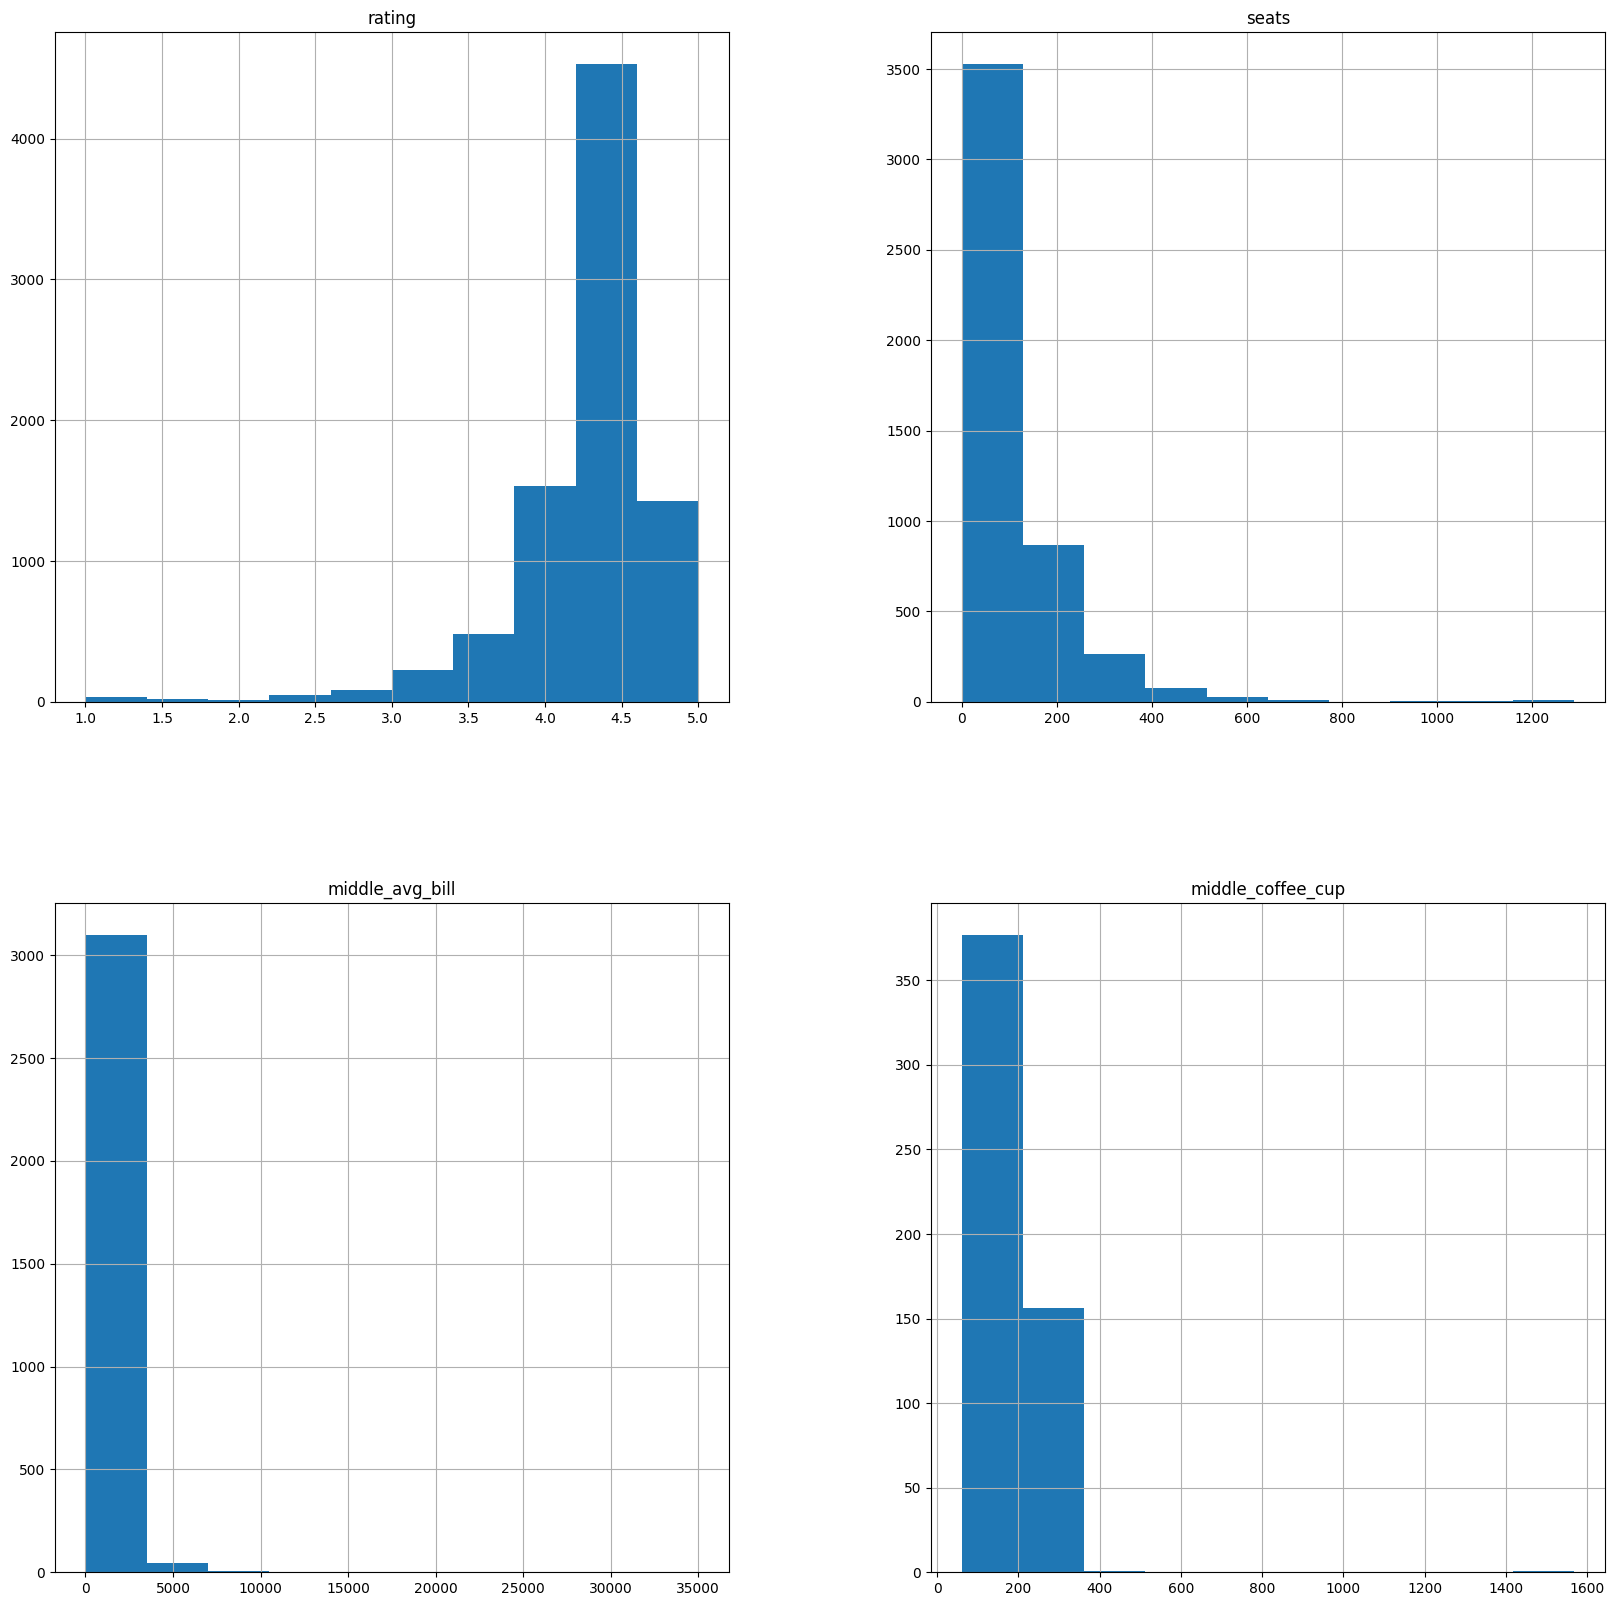

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Load data and display basic information
data = pd.read_csv('moscow_places.csv')
print(data.info())
display(data.head())

# List of numerical columns for which histogram makes sense
numerical_cols = numerical_cols = ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup']

# Plot histograms for the selected columns only
data[numerical_cols].hist(figsize=(20, 20))
plt.show()

**Based on the information from the dataset, we can make the following observations:**

* The dataset contains information about 8406 catering establishments in Moscow, with each establishment characterized by 14 features (columns).

* Missing data: Some columns have missing data (`hours`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`, and `seats`). The degree of missingness varies across these columns. This needs to be taken into account during further data preprocessing and analysis.

* Data types: The dataset consists of both numerical and non-numerical (object/string) columns. Numerical columns are already in the suitable format for mathematical computations and visualizations. String fields (`category`, `address`, etc.) may require further examination and possibly preprocessing (e.g., removal of any odd characters or words, standardization in case of discrepancies in representation, etc.).

Overall, before moving onto further exploratory or predictive data analysis, a careful data cleaning and pre-processing step should be undertaken to handle missing values, possibly outliers, and potentially incorrect data.

<a id="num4"></a>
## 2. Data preprocessing

<a id="num4.1"></a>
### 2.1 Handling empty values

**Find and examine the missing values in the columns.**

In [3]:
# Identify missing values in each column
missing_values = data.isnull().sum()

# Print the result
print(missing_values)

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64


In [4]:
# Calculate percentage of missing values for each column
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Round the result to two decimal places and sort by value
missing_values_percentage = missing_values_percentage.round(2).sort_values(ascending=False)

# Convert series into DataFrame and rename columns for better readability
missing_values_percentage = missing_values_percentage.reset_index()
missing_values_percentage.columns = ['Columns', 'Percentage of Missing Values']

# Display DataFrame
display(missing_values_percentage)

Columns  Percentage of Missing Values
0   middle_coffee_cup                         93.64
1     middle_avg_bill                         62.54
2               price                         60.56
3            avg_bill                         54.60
4               seats                         42.96
5               hours                          6.38
6                name                          0.00
7            category                          0.00
8             address                          0.00
9            district                          0.00
10                lat                          0.00
11                lng                          0.00
12             rating                          0.00
13              chain                          0.00

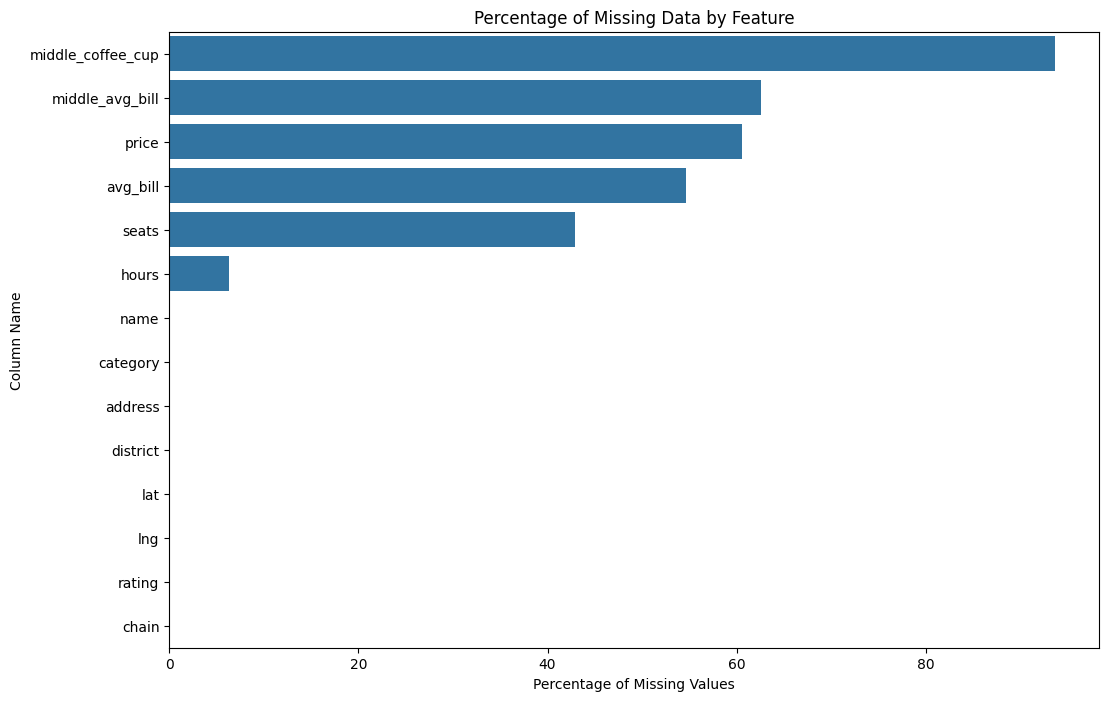

In [5]:
# Calculate the percentage of missing values
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Sort the series and convert to DataFrame
missing_values_df = missing_values_percentage.sort_values(ascending=False).reset_index()

# Rename the series for a better readability
missing_values_df.columns = ['Column Name', 'Percentage of Missing Values']

# Create a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x='Percentage of Missing Values', y='Column Name', data=missing_values_df)
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column Name')
plt.title('Percentage of Missing Data by Feature')
plt.show()

**Let's investigate the reason for the large number of omissions in the `middle_coffee_cup` column.**

* `middle_coffee_cup` is a number with the price of one cup of cappuccino, which is specified only for the values from the `avg_bill` column starting with the "Price of one cup of cappuccino" substring.

This large number of omissions in this column is probably due to the category of the establishment. Let's see how many categories of establishments have filled data in the `middle_coffee_cup` column.

In [6]:
# Create a pivot table
number_of_establishments = data.pivot_table(index='category', 
                                  values=['name', 'middle_coffee_cup', 'middle_avg_bill', 'price', 'avg_bill'], 
                                  aggfunc='count')

# Sort by number of establishments having 'middle_coffee_cup' value
number_of_establishments.sort_values(by='middle_coffee_cup', ascending=False)

avg_bill  middle_avg_bill  middle_coffee_cup  name  price
category                                                                  
кофейня               721              200                521  1413    476
бар,паб               485              349                  6   765    494
кафе                  698              694                  4  2378    633
пиццерия              400              395                  3   633    311
быстрое питание       238              237                  1   603    190
булочная               53               53                  0   256     41
ресторан             1040             1040                  0  2043   1017
столовая              181              181                  0   315    153

**As per the given pivot table:**

1. The "кофейня" (meaning "coffee house") category has the most establishments specifying a coffee price (521 establishments), which makes sense as these are specifically coffee-focused establishments. Many have not specified coffee prices, potentially due to differences in raw data collection or not having a specific average coffee price.

2. "бар,паб" (meaning "bar, pub") and "кафе" (meaning "cafe") categories do have some establishments specifying coffee price, but the number is comparatively low.

3. The other categories like "пиццерия" (pizzeria), "быстрое питание" (fast food), "булочная" (bakery), and "ресторан" (restaurant) have very few to no establishments with specified coffee prices. So, this suggests that these establishments either don't sell coffee as a primary product or this information was not collected for these categories.

4. In some categories such as fast food and bakery, despite a significant number of establishments, very few specify an average bill. This could be due to low prices that don't vary significantly between the establishments, or due to this data simply not being collected.

Therefore, the high percentage of missing data in the `middle_coffee_cup` column is mainly due to the nature of some establishments where coffee is not a primary sold product or this information is not collected or applicable, not necessarily because the dataset is faulty or incomplete.

All missing data in the columns provided are categorical data. They cannot be filled with the mean or median value. Therefore, we will fill them with the default value.

In [7]:
# Fill the missing values in categorical and numerical columns
values_to_fill = {'hours': 'unknown_hours', 
                  'price': 'unknown_price', 
                  'avg_bill': 'unknown_avg_bill', 
                  'middle_avg_bill': 0, 
                  'middle_coffee_cup': 0, 
                  'seats': -1}

data.fillna(value=values_to_fill, inplace=True)

<a id="num4.2"></a>
### 2.2 Duplicate processing

**Process duplicates in the dataset.**

In [8]:
# Convert text to lower case
data = data.apply(lambda s: s.str.lower() if s.dtype == 'object' else s)

# Find duplicates based on 'name', 'address', and 'district'
duplicates = data[data.duplicated(subset=['name', 'address', 'district'])]

# Print the number of duplicates found
print(f"Number of duplicate entries found: {len(duplicates)}")

Number of duplicate entries found: 4


In [9]:
# Drop duplicates
data.drop_duplicates(subset=['name', 'address', 'district'], inplace=True)

# Print out the number of rows after dropping duplicates
print(f"Number of rows after dropping duplicates: {data.shape[0]}")

Number of rows after dropping duplicates: 8402


In [10]:
# Check for explicit duplicates in all columns
explicit_duplicates = data.duplicated()
print(f"Number of explicit duplicates: {explicit_duplicates.sum()}")

# Check for implicit duplicates in 'name' and 'address' columns
# Here we're considering rows with same 'name' but slightly different 'address' (difference of 1 character) as duplicates
name_address_combinations = data[['name', 'address']].apply(lambda x: ''.join(x), axis=1)
implicit_duplicates = name_address_combinations.duplicated()
print(f"Number of implicit duplicates: {implicit_duplicates.sum()}")

Number of explicit duplicates: 0
Number of implicit duplicates: 0


<a id="num4.3"></a>
### 2.3 Adding new columns

**Let's create new columns:**

* Create a `street` column with street names from the address column.

* Let's create the `is_24_7` column indicating that the institution is open daily and around the clock (24/7): 

1. True - if the establishment is open daily and 24/7;
2. False - in the opposite case.

In [11]:
# List of possible street indicators
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

# Create regex pattern to extract street name
street_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

# Extract and store street names
data['street'] = data['address'].str.extract(street_pat)

# Display the first few entries
display(data.head())

name  category                              address  \
0                wowфли      кафе           москва, улица дыбенко, 7/1   
1        четыре комнаты  ресторан   москва, улица дыбенко, 36, корп. 1   
2                 хазри      кафе       москва, клязьминская улица, 15   
3  dormouse coffee shop   кофейня  москва, улица маршала федоренко, 12   
4             иль марко  пиццерия      москва, правобережная улица, 1б   

                          district  \
0  северный административный округ   
1  северный административный округ   
2  северный административный округ   
3  северный административный округ   
4  северный административный округ   

                                               hours   lat   lng  rating  \
0                             ежедневно, 10:00–22:00 55.88 37.48    5.00   
1                             ежедневно, 10:00–22:00 55.88 37.48    4.50   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00... 55.89 37.53    4.60   
3                             ежедневно, 09:00–22:00 55.88 37.49    5.00   
4                             ежедневно, 10:00–22:00 55.88 37.45    5.00   

           price                       avg_bill  middle_avg_bill  \
0  unknown_price               unknown_avg_bill             0.00   
1  выше среднего       средний счёт:1500–1600 ₽         1,550.00   
2        средние         средний счёт:от 1000 ₽         1,000.00   
3  unknown_price  цена чашки капучино:155–185 ₽             0.00   
4        средние         средний счёт:400–600 ₽           500.00   

   middle_coffee_cup  chain  seats                   street  
0               0.00      0  -1.00            улица дыбенко  
1               0.00      0   4.00            улица дыбенко  
2               0.00      0  45.00       клязьминская улица  
3             170.00      0  -1.00  улица маршала федоренко  
4               0.00      1 148.00      правобережная улица

In [12]:
# Check for missing values in the 'street' column
missing_street_data = data[data['street'].isna()]

# Print the number of missing values found
print(f"Number of missing values in 'street' column: {missing_street_data.shape[0]}")

Number of missing values in 'street' column: 229


Street omissions occurred because the remaining addresses are not streets. These omissions are only 2.7% of the total data. Let's fill the empty values in the street column with not_a_street.

In [13]:
# Fill missing values in the street column
data['street'] = data['street'].fillna('not_a_street')

# Print the remaining number of missing values in street column
print(f"Number of missing values in 'street' column after filling: {data['street'].isna().sum()}")

Number of missing values in 'street' column after filling: 0


**Let's create an is_24/7 column indicating that the establishment is open daily and 24/7.**

In [14]:
# Adding a column 'is_24/7' if 'ежедневно, круглосуточно' is in 'hours'
data['is_24/7'] = data['hours'].apply(lambda x: 1 if 'ежедневно, круглосуточно' in x else 0)

# Display the first few entries
display(data.head())

name  category                              address  \
0                wowфли      кафе           москва, улица дыбенко, 7/1   
1        четыре комнаты  ресторан   москва, улица дыбенко, 36, корп. 1   
2                 хазри      кафе       москва, клязьминская улица, 15   
3  dormouse coffee shop   кофейня  москва, улица маршала федоренко, 12   
4             иль марко  пиццерия      москва, правобережная улица, 1б   

                          district  \
0  северный административный округ   
1  северный административный округ   
2  северный административный округ   
3  северный административный округ   
4  северный административный округ   

                                               hours   lat   lng  rating  \
0                             ежедневно, 10:00–22:00 55.88 37.48    5.00   
1                             ежедневно, 10:00–22:00 55.88 37.48    4.50   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00... 55.89 37.53    4.60   
3                             ежедневно, 09:00–22:00 55.88 37.49    5.00   
4                             ежедневно, 10:00–22:00 55.88 37.45    5.00   

           price                       avg_bill  middle_avg_bill  \
0  unknown_price               unknown_avg_bill             0.00   
1  выше среднего       средний счёт:1500–1600 ₽         1,550.00   
2        средние         средний счёт:от 1000 ₽         1,000.00   
3  unknown_price  цена чашки капучино:155–185 ₽             0.00   
4        средние         средний счёт:400–600 ₽           500.00   

   middle_coffee_cup  chain  seats                   street  is_24/7  
0               0.00      0  -1.00            улица дыбенко        0  
1               0.00      0   4.00            улица дыбенко        0  
2               0.00      0  45.00       клязьминская улица        0  
3             170.00      0  -1.00  улица маршала федоренко        0  
4               0.00      1 148.00      правобережная улица        0

<a id="num4.4"></a>
### 2.4 Processing of abnormal values 

**Let's identify and remove anomalous values in other columns.**

**We take into account that we want to remove no more than 10% of the data from the entire dataset, so we will reduce the quartile values.**

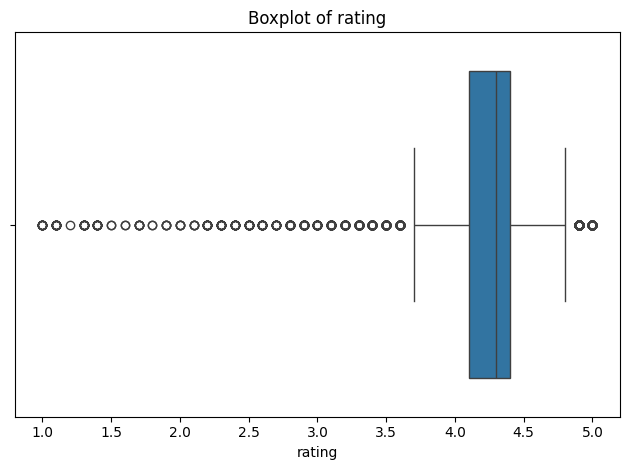

Percentage of anomalous values in rating: 11.06%


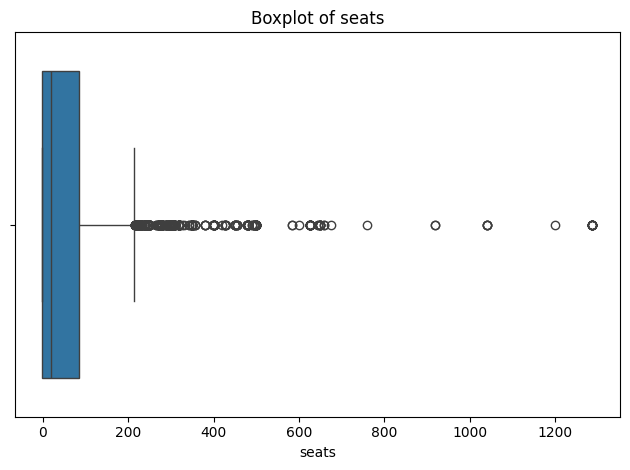

Percentage of anomalous values in seats: 7.09%


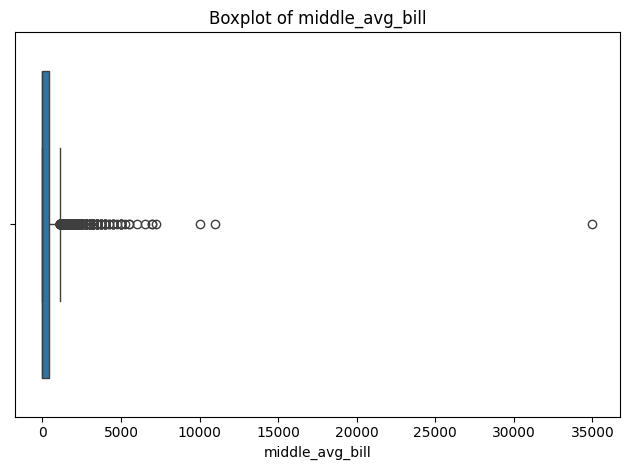

Percentage of anomalous values in middle_avg_bill: 11.79%


In [15]:
columns = ['rating', 'seats', 'middle_avg_bill']

for column in columns:
    # Generate boxplot for the current column
    sns.boxplot(x=data[column]);
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    percentage = len(outliers) / len(data) * 100

    print(f"Percentage of anomalous values in {column}: {percentage:.2f}%")

In [16]:
original_size = len(data)
print("Original size of dataset: ", original_size)

for column in columns:
    df = data.copy()
    
    Q1 = data[column].quantile(0.15)
    Q3 = data[column].quantile(0.85)
    IQR = Q3 - Q1

    df = df[~((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]

    removed_rows = original_size - len(df)
    removed_percentage = (removed_rows / original_size) * 100

    print(f"Anomaly removal in {column}:")
    print(f"  Data size after removal: {len(df)}")
    print(f"  Rows removed: {removed_rows}")
    print(f"  Percentage of data removed: {removed_percentage:.2f}%\n")

Original size of dataset:  8402
Anomaly removal in rating:
  Data size after removal: 8131
  Rows removed: 271
  Percentage of data removed: 3.23%

Anomaly removal in seats:
  Data size after removal: 8202
  Rows removed: 200
  Percentage of data removed: 2.38%

Anomaly removal in middle_avg_bill:
  Data size after removal: 8298
  Rows removed: 104
  Percentage of data removed: 1.24%



**Overall conclusion:** 

Data preprocessing was performed.

1. duplicates were removed;
2. Gaps in the stems were replaced;
3. Created `street` column with street names from the address column;
4. An `is_24/7` column has been created to indicate that the establishment is open daily and around the clock (24/7);
5. Brought the dataframe values to lower case.
6. Removed the abnormal values (1,2%). 

<a id="num5"></a>
## 3. Exploratory data analysis 

**Explore the number of catering facilities by category: restaurants, coffee shops, pizzerias, bars, and so on. Build visualizations. We will answer the question about the distribution of establishments by categories.**

category
кафе               2371
ресторан           1963
кофейня            1413
бар,паб             752
пиццерия            629
быстрое питание     600
столовая            314
булочная            256
Name: count, dtype: int64


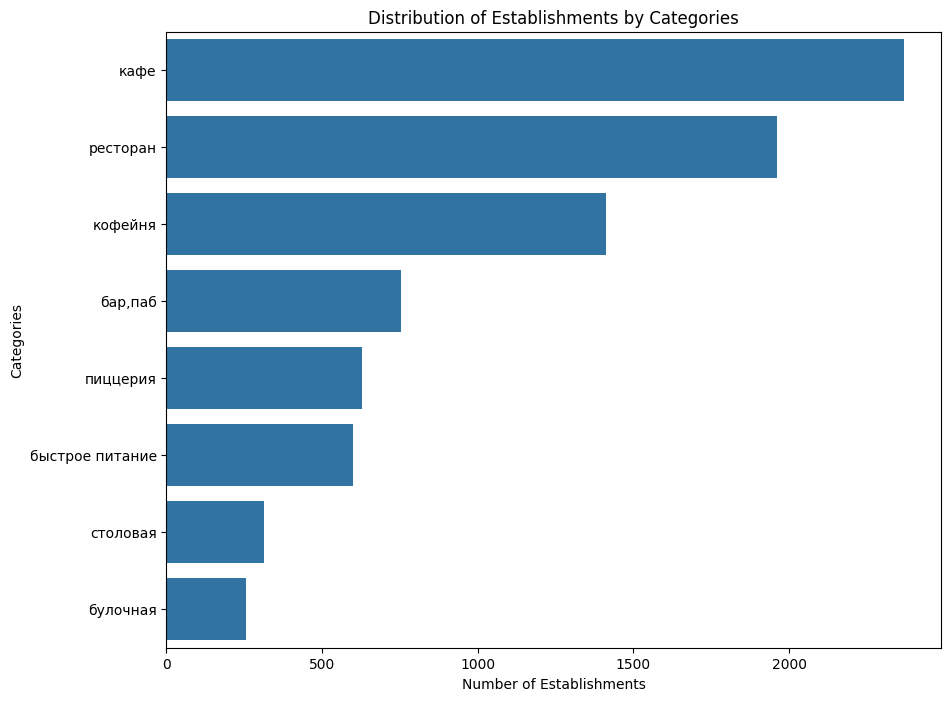

In [17]:
# Count the number of different types of catering facilities
category_counts = df['category'].value_counts()

# Print the types and counts
print(category_counts)

# Create a horizontal bar plot for the types of facilities using Seaborn
plt.figure(figsize=(10,8))
sns.barplot(x=category_counts, y=category_counts.index)

# Set labels and title for the plot
plt.xlabel('Number of Establishments')
plt.ylabel('Categories')
plt.title('Distribution of Establishments by Categories')

# Show the plot
plt.show()

**Conclusion:**

1. The most common type of catering establishment in Moscow is a Café (кафе) with 2371 establishments. This is followed by Restaurants (ресторан) and Coffee Shops (кофейня), which are quite common as well with 1963 and 1413 establishments, respectively..

2. The number of Bars and Pubs (бар, паб), Pizzerias (пиццерия), Fast Food (быстрое питание) and Dining Halls (столовая) are lesser compared to the aforementioned categories. Specifically, Bars and Pubs are around 752, Pizzerias are 629, fast food chains are 600 and dining halls are 314 in number.

3. The least common out of the examined categories seems to be the Bakeries (булочная) with only 256 establishments.

It is interesting to note that despite the international trend towards fast food and pizzerias, in Moscow Cafés and Restaurants are still the most popular types of catering establishments. This might point to a cultural preference for these types of establishments in the region.

**Research the number of seats in locations by category: restaurants, coffee shops, pizzerias, bars, and so on.**

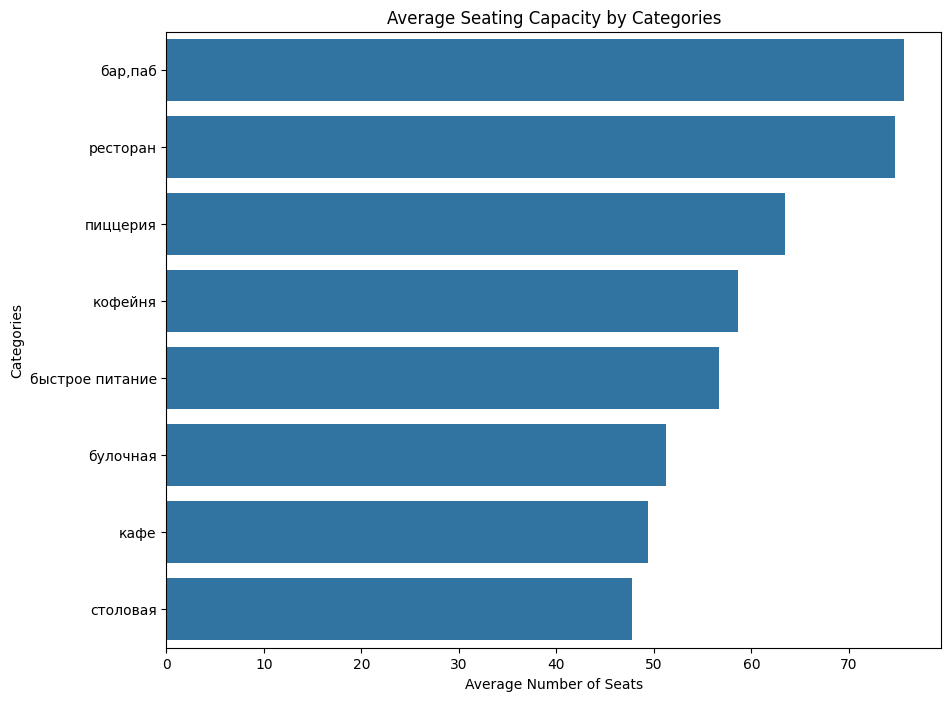

In [18]:
# Group data by category and calculate mean seating capacity
seating_capacity = df.groupby('category')['seats'].mean().sort_values(ascending=False)

# Create a horizontal bar plot of seat capacity using seaborn
plt.figure(figsize=(10,8))
sns.barplot(x=seating_capacity, y=seating_capacity.index)

# Set labels and title for the plot
plt.xlabel('Average Number of Seats')
plt.ylabel('Categories')
plt.title('Average Seating Capacity by Categories')

# Show the plot
plt.show()

In [19]:
seating_capacity

category
бар,паб           75.70
ресторан          74.74
пиццерия          63.44
кофейня           58.63
быстрое питание   56.70
булочная          51.25
кафе              49.40
столовая          47.80
Name: seats, dtype: float64

**Conclusion:**

1. Looking at the average seating capacities, Bars and Pubs (бар, паб) and Restaurants (ресторан) tend to have highest seating capacities with 75.7 and 74.74 seats on average respectively. This suggests that these types of venues are often larger and can accommodate more customers at a time.

2. Pizzerias (пиццерия) follow them with average seating capacity of around 63.44.

3. Coffee shops (кофейня) and Fast food chains (быстрое питание) have fairly similar average seating capacities of 58.63 and 56.7 respectively, suggesting that these places tend to be more compact and beam towards a quicker turnover of customers.

4. Interestingly, Bakeries (булочная) have more seats on average (51.25) compared to Cafes (кафе, 49.4) and Dining Halls (столовая, 47.8), which are the types with the lowest average seating capacities among the categories investigated.

**Look at and depict the ratio of chain and non-network establishments in the dataset.** 

chain
0    5104
1    3194
Name: count, dtype: int64


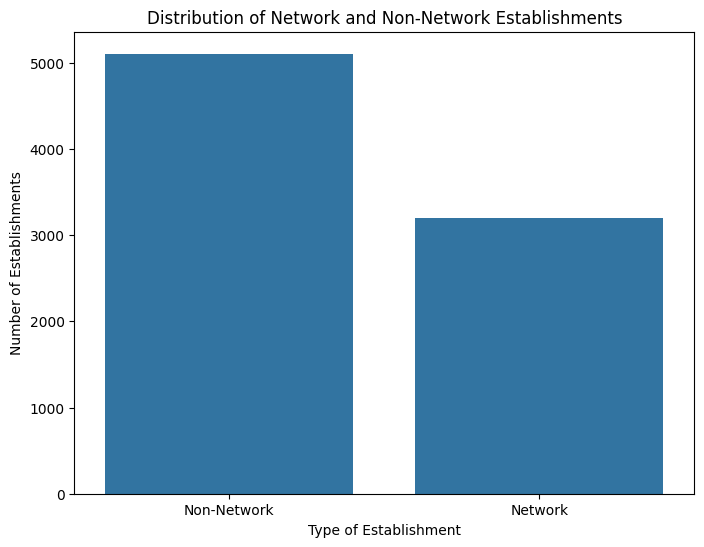

In [20]:
# Count the number of network and non-network establishments
chain_counts = df['chain'].value_counts()

# Print the types and counts
print(chain_counts)

# Create a bar plot for the number of network and non-network establishments
plt.figure(figsize=(8,6))
sns.barplot(x=chain_counts.index, y=chain_counts)

# Set labels and title for the plot
plt.xlabel('Type of Establishment')
plt.ylabel('Number of Establishments')
plt.xticks([0,1], ['Non-Network', 'Network'])
plt.title('Distribution of Network and Non-Network Establishments')

# Show the plot
plt.show()

**Based on these results:**

From the given data, we can see that in Moscow, non-chain or independent catering establishments outnumber chain restaurants with a count of 5104 compared against 3194 for chain establishments. This suggests that over 60% of the establishments are independent, while approximately 40% are part of a chain.

This shows that despite the rapid growth of chain restaurants in many parts of the world, independent establishments continue to make up a significant proportion of the catering market in Moscow.

**Let's determine which categories of establishments are more likely to be chain establishments.**

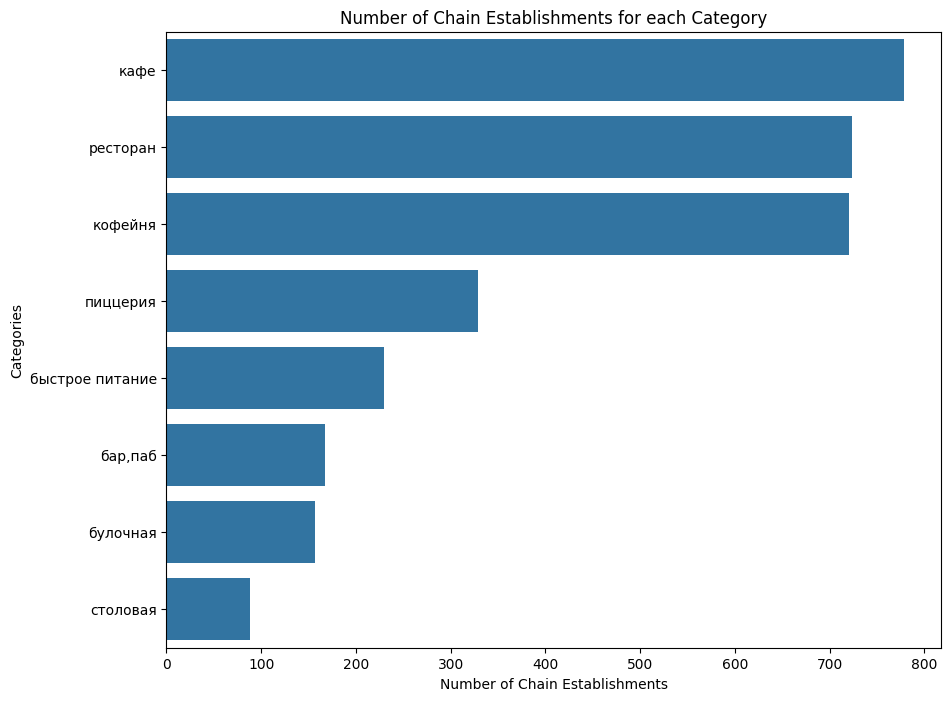

In [21]:
plt.figure(figsize=(10,8)) # Set plot size

# Group by category and calculate sums 
chain_by_category = df.groupby('category')['chain'].sum()

# Sort values in descending order
chain_by_category.sort_values(ascending=False, inplace=True)

# Create a bar plot
sns.barplot(x=chain_by_category, y=chain_by_category.index)

plt.xlabel('Number of Chain Establishments') # X label
plt.ylabel('Categories') # Y label
plt.title('Number of Chain Establishments for each Category')

# Display plot
plt.show()

**Conclusion:**

1. As seen from the data, Café (кафе) is the category with the highest number of chain establishments, being represented by 779 chains. This is followed closely by Restaurants (ресторан) and Coffee Shops (кофейня) with 724 and 720 chains respectively.

2. Pizzerias (пиццерия) have a significant presence in the chain market as well, reaching 329 chains.

3. Fast food establishments (быстрое питание) also partake in the chain establishment market with 230 chains.

4. Bars and Pubs (бар, паб) are less represented in this market according to this data, having 167 chain establishments.

5. Bakeries (булочная) and Dining halls (столовая) are last with 157 and 88 chains respectively.

It can be suggested that catering establishments like cafés, restaurants, and coffee shops, that typically have broad appeal and universal menu options, are more likely to be successful as chains. Conversely, the relatively lower incidences of chain bars, pubs, bakeries and dining halls may be due to these establishments being more unique, requiring fresh produce or offering a more niche service.

**Let's group the data by the names of establishments and find the top 15 popular chains in Moscow. Popularity means the number of establishments of this chain in the region.**

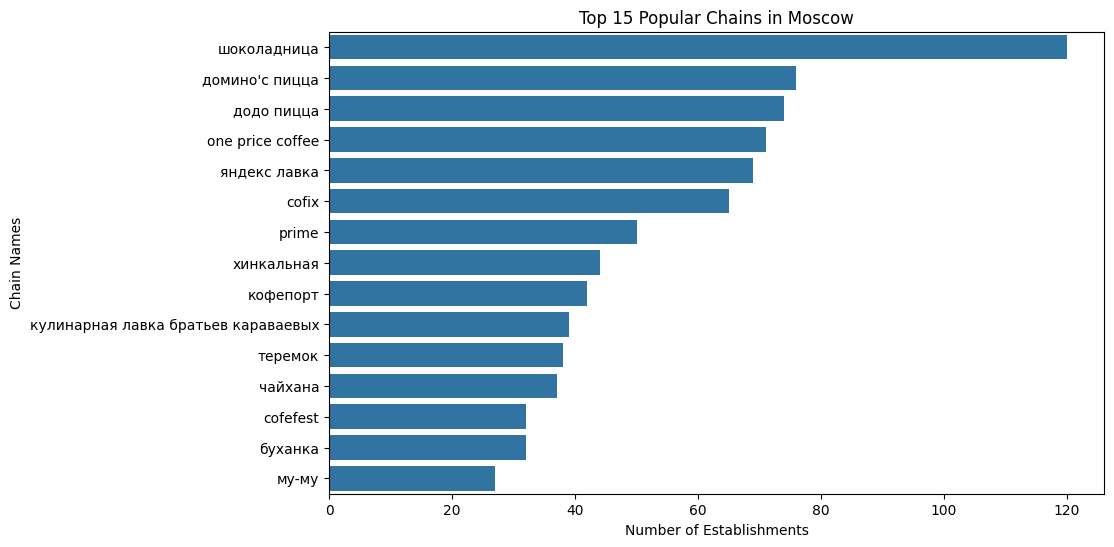

In [22]:
# Group by name and count the number of occurrences for each chain
popular_chains = df[df['chain'] == 1]['name'].value_counts().head(15)

# Create an horizontal bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=popular_chains, y=popular_chains.index)

# Set labels and title
plt.xlabel('Number of Establishments')
plt.ylabel('Chain Names')
plt.title('Top 15 Popular Chains in Moscow')

# Show the plot
plt.show()

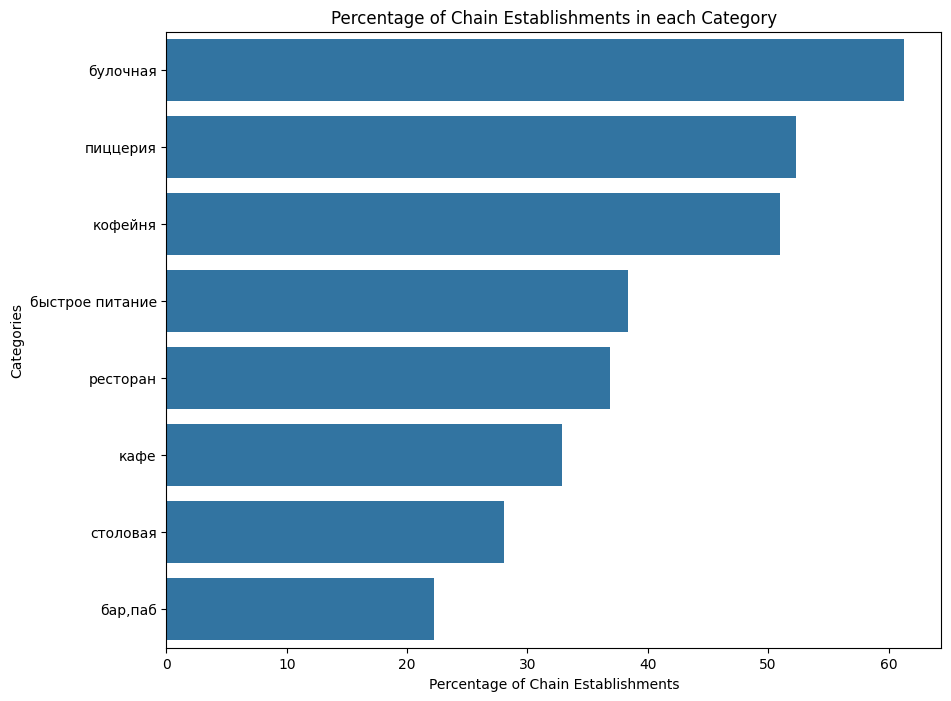

In [23]:
# Count the total number of establishments of each category
total_counts = df['category'].value_counts()

# Count the number of chain establishments of each category
chain_counts = df[df['chain'] == 1]['category'].value_counts()

# Calculate the percentage of chain establishments out of the total number of establishments of each type
chain_ratio = (chain_counts / total_counts) * 100

# Sort in descending order
chain_ratio_sorted = chain_ratio.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=chain_ratio_sorted, y=chain_ratio_sorted.index)

# Add labels and title
plt.xlabel('Percentage of Chain Establishments')
plt.ylabel('Categories')
plt.title('Percentage of Chain Establishments in each Category')

# Show the plot
plt.show()

**Conclusion:**

Looking at the most popular chains in Moscow, the "Шоколадница" chain tops the list with a total of 120 establishments. It is followed by "Domino's Pizza" with 76 outlets and "Dodo Pizza" with 74 outlets.

Other note-worthy chains include "One Price Coffee", "Yandex Lavka", and "Cofix" having more than 60 outlets each.

"Prime", "Khinkalnaya", "Cofeport" and "Culinary Workshop of Brothers Karavaevs" also hold substantial presence in the Moscow market, each with 40 or more establishments.

It is noteworthy that most of these popular chains fall under the categories of café, pizza or coffee shops, aligning with our earlier analysis that suggested these categories are commonly represented in chains.

Further examination of the data shows that in terms of the ratio of chains to non-chain establishments by category, bakeries ("булочная") top the list with over 61% of bakeries being chains. More than half of the pizzeria ("пиццерия") and coffee shop ("кофейня") establishments are also chain businesses, with ratios of 52.3% and 51% respectively.

Fast food establishments ("быстрое питание") and restaurants ("ресторан") exhibit about a 38.3% and 36.8% chain ratio, whereas café ("кафе") and dining halls ("столовая") show a slightly lower propensity for chain operations, with chain ratios of approximately 32.9% and 28% respectively.

The category with the lowest chain ratio are bars and pubs ("бар, паб") with a chain ratio of just over 22.2%.

These numbers are indicative of the distinct business models typical for different catering establishments. Some types of establishments such as bakeries, pizzerias and coffee shops might lend themselves more naturally to a chain business model possibly due to their relatively standardized products and services, while other types such as bars and pubs might tend to be more unique and thus less often part of a chain.

**Determine which administrative districts of Moscow are present in the dataset? Display the total number of establishments and the number of establishments in each category by district.**

                                  district  category  cnt
46      центральный административный округ  ресторан  621
43      центральный административный округ      кафе  464
44      центральный административный округ   кофейня  428
40      центральный административный округ   бар,паб  354
51    юго-восточный административный округ      кафе  280
..                                     ...       ...  ...
32  северо-западный административный округ   бар,паб   23
39  северо-западный административный округ  столовая   18
63     юго-западный административный округ  столовая   17
49    юго-восточный административный округ  булочная   13
33  северо-западный административный округ  булочная   12

[72 rows x 3 columns]


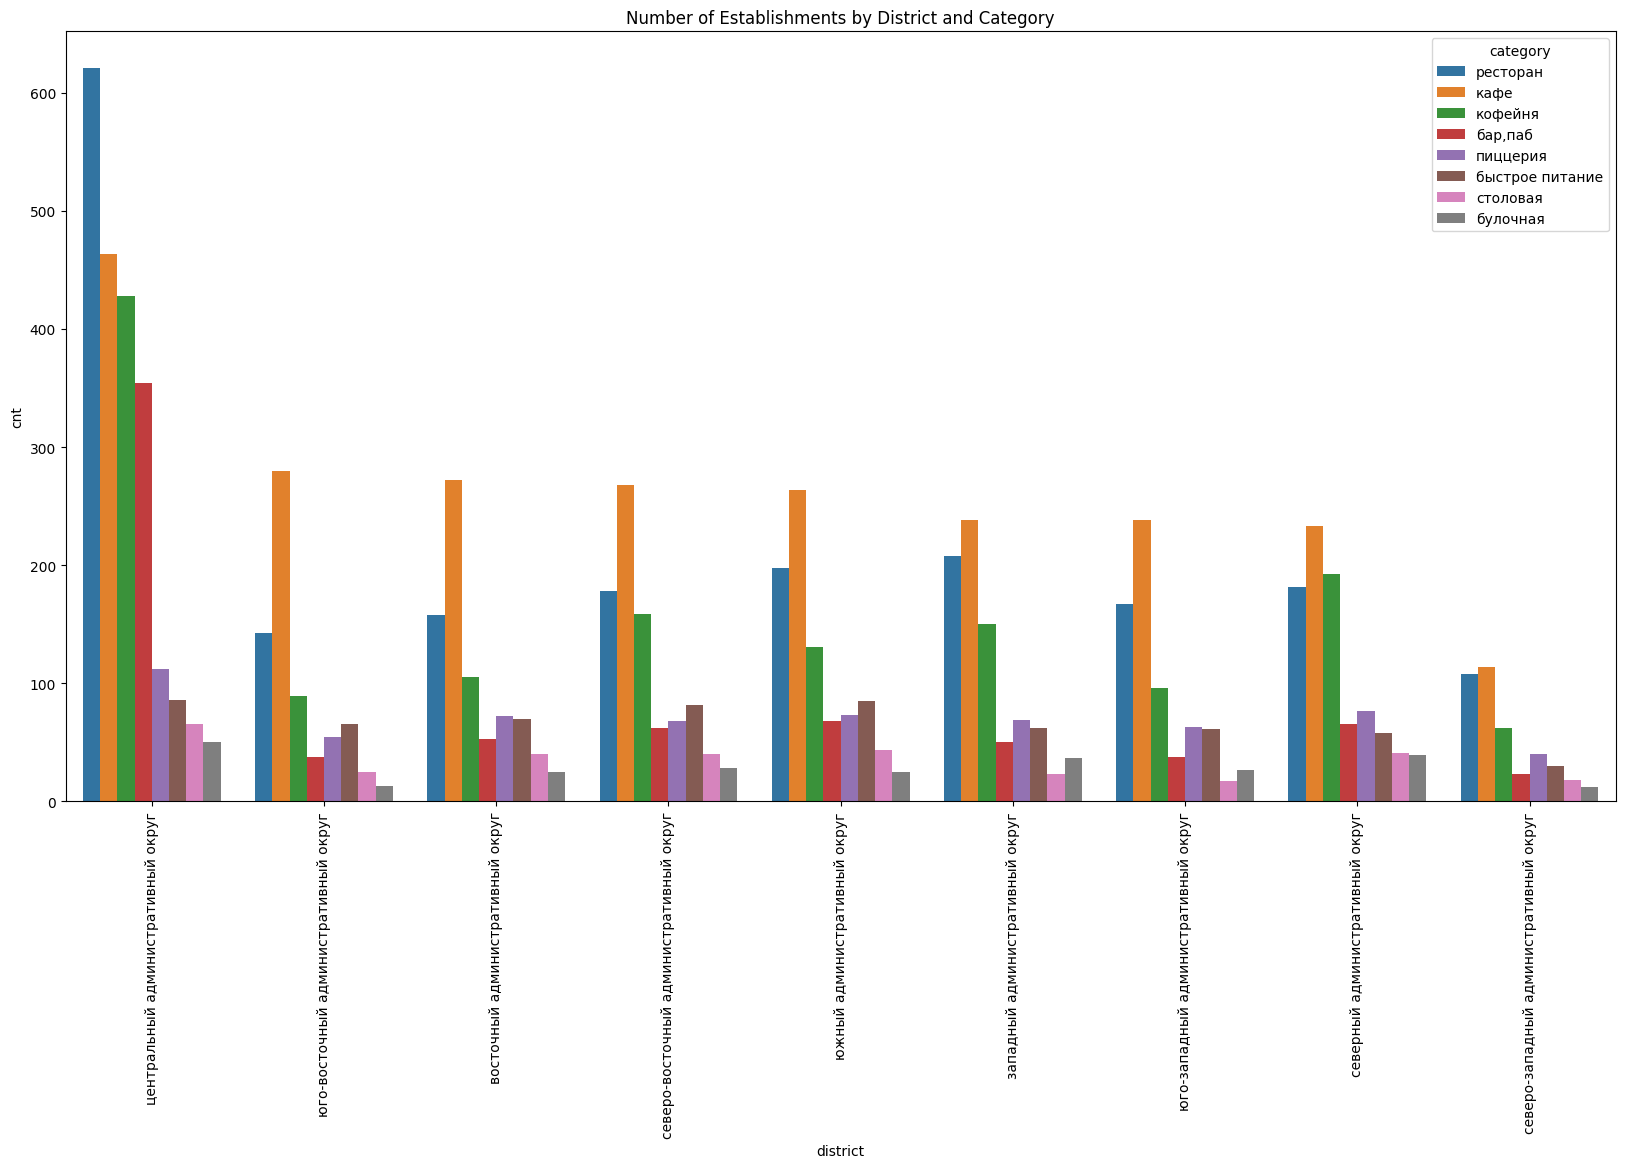

In [24]:
# Count the total number of establishments by district and category
district_category_count = df.groupby(['district', 'category']).size().reset_index(name='cnt')

# Display the data
district_category_count = district_category_count.sort_values(by=['cnt'], ascending=False)
print(district_category_count)

# Create a barplot
plt.figure(figsize=(20, 10))
sns.barplot(data=district_category_count, x='district', y='cnt', hue='category')
plt.xticks(rotation=90)
plt.title('Number of Establishments by District and Category')
plt.show()

**Conclusions:** 

From the extracted data and visualization, it is clear that the Central Administrative District or "Центральный административный округ" has the highest number of catering establishments in Moscow across almost all categories, specifically leading in the 'restaurant', 'cafe', 'coffee shop', and 'bar, pub' categories. This is expected as it's usually the most crowded area in a city and possesses several attractions and offices, thereby forming a substantial demand for food and drink establishments.

Generally, we see cafes being the most common type of establishments across every district ('юго-восточный административный округ', 'восточный административный округ', 'северо-восточный административный округ', 'южный административный округ', 'западный административный округ', and 'северный административный округ').

Restaurants seem to be the second most popular types, followed by the 'coffee shop' category across these districts.

It is also notably observed that 'fast food' chains hold considerable presence across all districts except the Central Administrative District where its presence is overtaken by 'bars, pubs' category.

Interestingly, the 'bakery' category seems to have a somewhat significant presence in the Central Administrative District whereas it's quite less in the other ones. This might be because of higher tourist traffic in the central district, leading to larger demand for such grab-and-go type food outlets.

In case of 'dining hall' ('столовая') category, such type of establishments seem to be the least popular across all districts, suggesting that this type of dine-in facilities might be less favored in Moscow, possibly due to changing consumer preferences favoring cafes, restaurants, and quick service spots.

**We visualize the distribution of average ratings by institution category.**

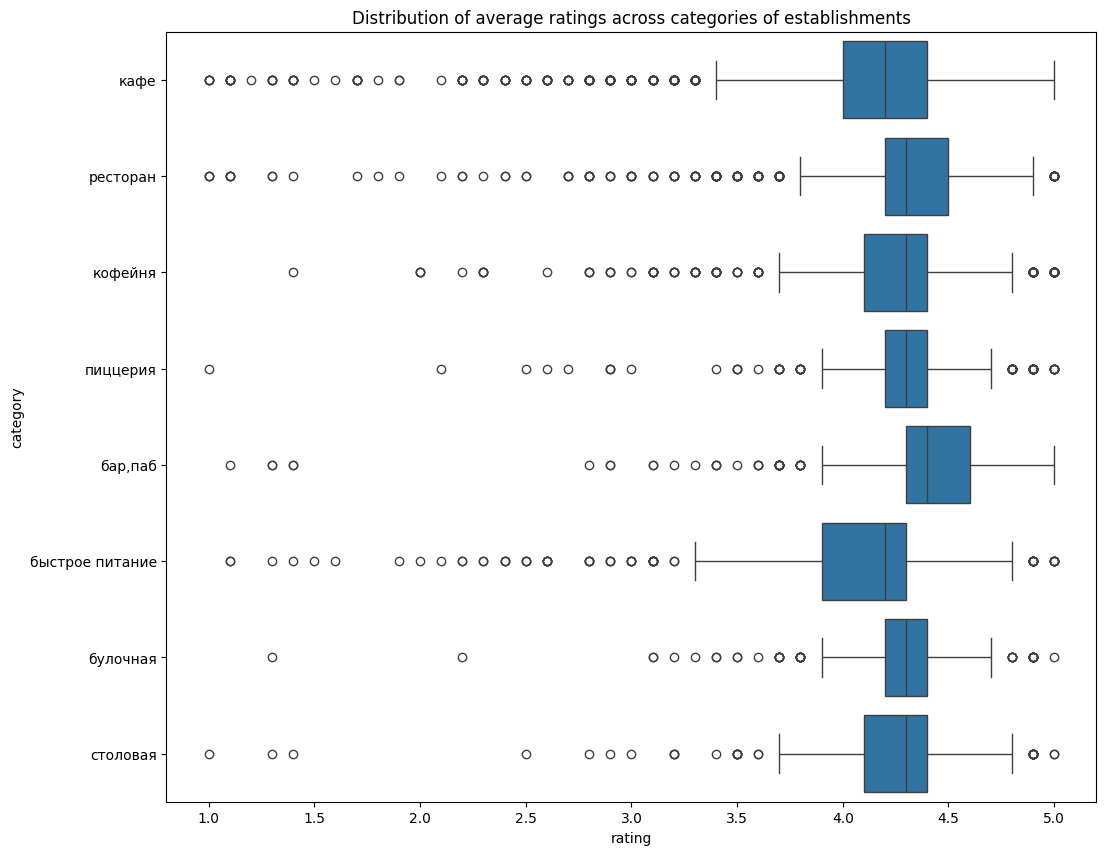

In [25]:
# Create a boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(x='rating', y='category', data=df)
plt.title('Distribution of average ratings across categories of establishments')
plt.show()

In [26]:
rating_stats = df.groupby('category')['rating'].describe().T
display(rating_stats)

category  бар,паб  булочная  быстрое питание     кафе  кофейня  пиццерия  \
count      752.00    256.00           600.00 2,371.00 1,413.00    629.00   
mean         4.39      4.27             4.05     4.13     4.28      4.30   
std          0.38      0.39             0.56     0.56     0.37      0.34   
min          1.10      1.30             1.10     1.00     1.40      1.00   
25%          4.30      4.20             3.90     4.00     4.10      4.20   
50%          4.40      4.30             4.20     4.20     4.30      4.30   
75%          4.60      4.40             4.30     4.40     4.40      4.40   
max          5.00      5.00             5.00     5.00     5.00      5.00   

category  ресторан  столовая  
count     1,963.00    314.00  
mean          4.28      4.21  
std           0.42      0.45  
min           1.00      1.00  
25%           4.20      4.10  
50%           4.30      4.30  
75%           4.50      4.40  
max           5.00      5.00

**Conclusions:** 

The box plot and table above provide a survey of the distribution of average ratings across different categories of establishments.

The data shows that all types of establishments range in ratings from low (around 1) to the highest possible rating (5). For all categories, the median ratings are located above 4, which implies that most establishments tend to offer a satisfactory service or better as perceived by customers, at least according to the ratings in the dataset.

Looking closer at the data, Bars and Pubs (бар, паб) have the highest mean rating of 4.39, indicating that customers generally have a favorable experience in these venues. They also have the smallest standard deviation (0.38), suggesting that the ratings are tightly clustered around the mean, and variation in customers' experience is less pronounced.

Cafes (кафе) and Fast Food chains (быстрое питание) portray a somewhat wide distribution of ratings with standard deviations of 0.56 for both categories. This may indicate a higher variability in customers' experiences at these particular types of venues.

Dining halls (столовая) and fast food chains (быстрое питание) exhibit notably lower mean scores (4.21 and 4.05 respectively) compared to other types of establishments, suggesting a potentially less satisfactory customer experience.

Please note that ratings are subjective to customer preferences and experiences and can be influenced by a variety of factors outside of the direct control of the establishment. There can also be some bias in the ratings as people who had either very good or very bad experiences are often more likely to leave a review.

**Let's build a background cartogram (choropleth) with the average rating of establishments of each district.**

In [27]:
# Calculate the mean rating by district
mean_rating = df.groupby('district')['rating'].mean().reset_index()

# Load GeoJSON data
with open('admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

# Make sure the district names match in both our data and the GeoJSON file
for mdict in geo_json['features']:
    mdict['name'] = mdict['name'].lower()

# Location of Moscow
moscow_lat, moscow_lng = 55.751244, 37.618423

# Create a map of Moscow
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# Create a Choropleth and add it to the map
Choropleth(
    geo_data=geo_json,
    data=mean_rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    legend_name='Average rating of establishments by district',
).add_to(m)

# Display the map
m

In [28]:
mean_rating

district  rating
0         восточный административный округ    4.17
1          западный административный округ    4.18
2          северный административный округ    4.24
3  северо-восточный административный округ    4.15
4   северо-западный административный округ    4.21
5       центральный административный округ    4.37
6     юго-восточный административный округ    4.10
7      юго-западный административный округ    4.17
8             южный административный округ    4.18

**Conclusions:**

The choropleth map and data table represent the average rating of establishments by districts across Moscow.

From the diagram and the table, we see that the Central Administrative District (Центральный административный округ) has the highest average rating of 4.37, indicating a general satisfaction of customers with the food and services in establishments in this district.

On the contrary, the Southeastern Administrative District (Юго-восточный административный округ) shows lower average ratings of 4.10 compared to other districts, implying a relatively lower customer satisfaction.

The other districts (Eastern, Western, Northern, Northeastern, Northwestern, Southwestern, Southern Administrative Districts) indicate fairly similar average ratings ranging between 4.15 to 4.24, thus not having a significant difference in the quality of services as per customer ratings.

**Let's display all dataset institutions on the map with the help of clusters using the folium library.**

In [29]:
# Create a map
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# Create a Marker Cluster
marker_cluster = MarkerCluster().add_to(m)

# Create a marker for each record in the dataset
for i in range(len(df)):
    location = [df.iloc[i]['lat'], df.iloc[i]['lng']]
    tooltip = f"{df.iloc[i]['name']}, {df.iloc[i]['district']}, {df.iloc[i]['rating']}"

    Marker(location, tooltip=tooltip).add_to(marker_cluster)

# Display the map
m

**Conclusions:**

The Central Administrative District appears to have the highest concentration of institutions, with a total of 2181. 

Following the Central District, the Northern Administrative District has the next highest number of institutions at 889. Interestingly, the numbers then slightly vary across the rest of the districts with the North-East Administrative District at 885 and the South Administrative District at 888.

Meanwhile, the North-Western and South-Eastern Administrative Districts have significantly fewer institutions, with only 407 and 709 respectively.

The Western and Eastern Administrative District both have quite a substantial number of institutions with 795 and 837 respectively which might imply mixed-use regions, with a good balance of residential, commercial, and service institutions.

**Find the top 15 streets by number of establishments.**

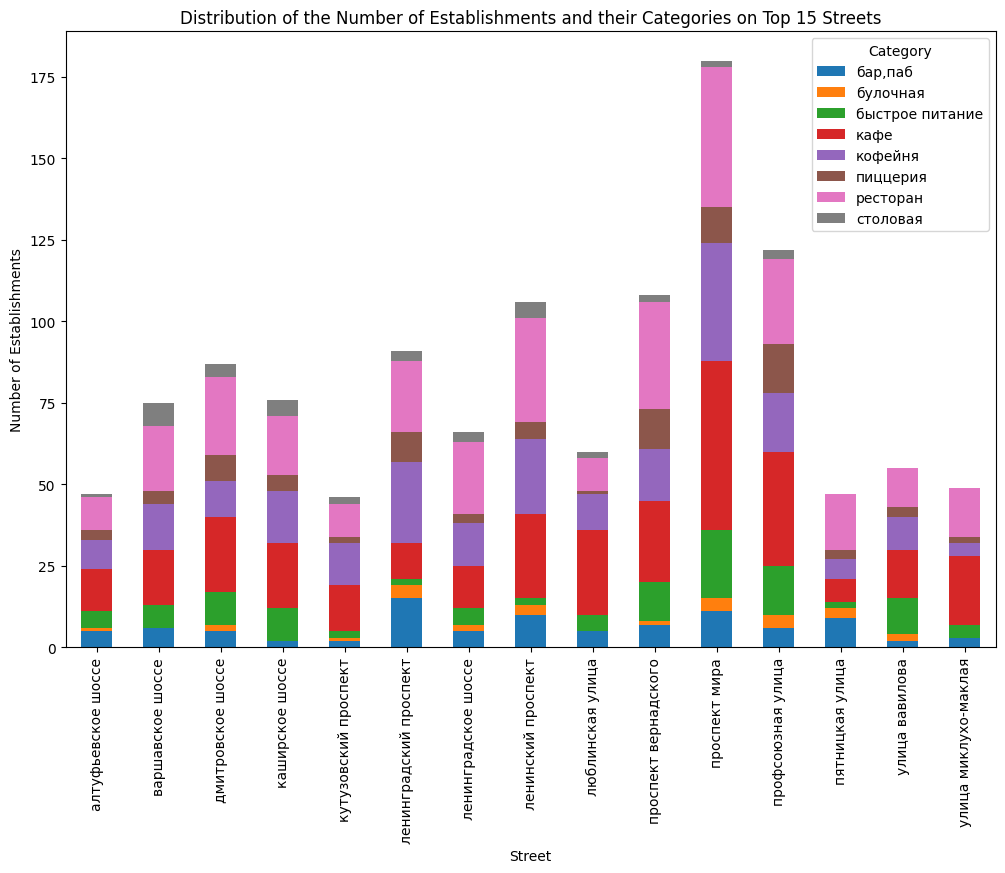

In [30]:
# Find the top 15 streets by number of establishments, excluding 'not_a_street'
top_streets = df[df['street'] != 'not_a_street']['street'].value_counts().head(15).index

# Filter the original DataFrame to include only the establishments on the top 15 streets
df_top_streets = df[df['street'].isin(top_streets)]

# Compute the counts category-wise for graphical representation
street_category_count = df_top_streets.groupby(['street', 'category']).size().reset_index(name='cnt')

# Convert to wide format for easier plotting
wide_count = street_category_count.pivot_table(index='street', columns='category', values='cnt', fill_value=0)

# Plot the distribution using stacked bar plot
wide_count.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of the Number of Establishments and their Categories on Top 15 Streets')
plt.xlabel('Street')
plt.ylabel('Number of Establishments')
plt.legend(title='Category')
plt.xticks(rotation=90)
plt.show()

**Conclusions:**

The data shows that the top 15 streets with the highest number of establishments in the city. On these streets, the establishments are further broken down into categories: bar/pub, bakery, fast food, cafe, coffee shop, pizzeria, restaurant, and canteen.

1. Profsouznaia street has the highest number of cafes (35) and an equally high number of fast food restaurants (15).

2. Prospect Mira notably has the highest number of cafes (52) and restaurants (43).

3. Prospect Vernadskogo also boasts a significant number of establishments, leading in number of restaurants (33) and fast food places (12).

4. On Leninsky Prospect, restaurants seem to be extremely popular with the highest count (32) among other streets. The number of cafes (26) is also a quite high.

5. Leningradsky Prospect and Kutuzovsky Prospect both also host a significant number of institutions, with coffee shops being particularly popular on these streets.

**Let's analyze prices in the central administrative district and others.**

In [31]:
# Filter out 0 values in 'middle_avg_bill' column and create DataFrame
df_new = df[df['middle_avg_bill'] != 0]

# Aggregate median of 'middle_avg_bill' grouped by 'district'
medians = df_new.groupby('district')['middle_avg_bill'].median().reset_index()

# Sort DataFrame by median in descending order
medians = medians.sort_values('middle_avg_bill', ascending=False)

# Create Moscow map centered at Moscow's lat, lng
m = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# Choropleth layer for median price in Moscow's districts
choropleth = folium.Choropleth(
    geo_data=geo_json,
    data=medians,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='BuGn',
    fill_opacity=0.8,
    legend_name='Median bill by district'
)

# Add choropleth layer to the map
choropleth.add_to(m)

# Display the map
m

In [32]:
medians

district  middle_avg_bill
5       центральный административный округ         1,000.00
1          западный административный округ           850.00
4   северо-западный административный округ           675.00
2          северный административный округ           650.00
7      юго-западный административный округ           600.00
0         восточный административный округ           550.00
3  северо-восточный административный округ           500.00
8             южный административный округ           500.00
6     юго-восточный административный округ           434.00

**Conclusions:**

The data represents the median bill values for establishments located in different districts of the city.

As per the data, the Central Administrative District has the highest median bill value of 1000 units. This implies that establishments here are generally more high-end, likely catering to a clientele with a higher spending power or a significant amount of businesses and commercial activity. This area is probably the city's central business district or a similarly affluent area.

The Western Administrative District follows with a median bill value slightly lower at 850 units, suggesting similarly high-end establishments although not quite as high as the Central District.

The North-Western and Northern Administrative Districts have a median bill in the range of 650-675 units, indicating they might also have a considerable proportion of upscale establishments.

The South-Western, Eastern, North-Eastern, and Southern Districts have median bills in the range of 500-600 units, indicating a moderate pricing level for these areas.

The South-Eastern Administrative District has the lowest median bill value at 434 units. This suggests it might have more budget-friendly establishments, catering to a more price-sensitive clientele or lower-income area.

**Overall conclusion of the section:**

The data insights provide a breakdown of the catering industry in Moscow. Cafés, restaurants, and coffee shops are the most common types of establishments. Non-chain establishments outnumber chain establishments. The Central Administrative District is the most populous area for these businesses, especially cafés and restaurants. Despite bars and pubs presenting the highest ratings, all establishments generally provide satisfactory service, with a median rating above four. The Central Administrative District also has the highest average rating among the districts but exhibits the highest median bill value. This suggests the district caters to a higher-spending clientele or is a central business hub. 

<a id="num6"></a>
## 4. Detailed research: opening a coffee shop

**Let's determine how many coffee shops are contained in the dataset and which neighborhoods have the most of them.**

There are 1413 coffee shops in the dataset.
                                  District  Number of coffee shops
0       центральный административный округ                     428
1          северный административный округ                     193
2  северо-восточный административный округ                     159
3          западный административный округ                     150
4             южный административный округ                     131
5         восточный административный округ                     105
6      юго-западный административный округ                      96
7     юго-восточный административный округ                      89
8   северо-западный административный округ                      62


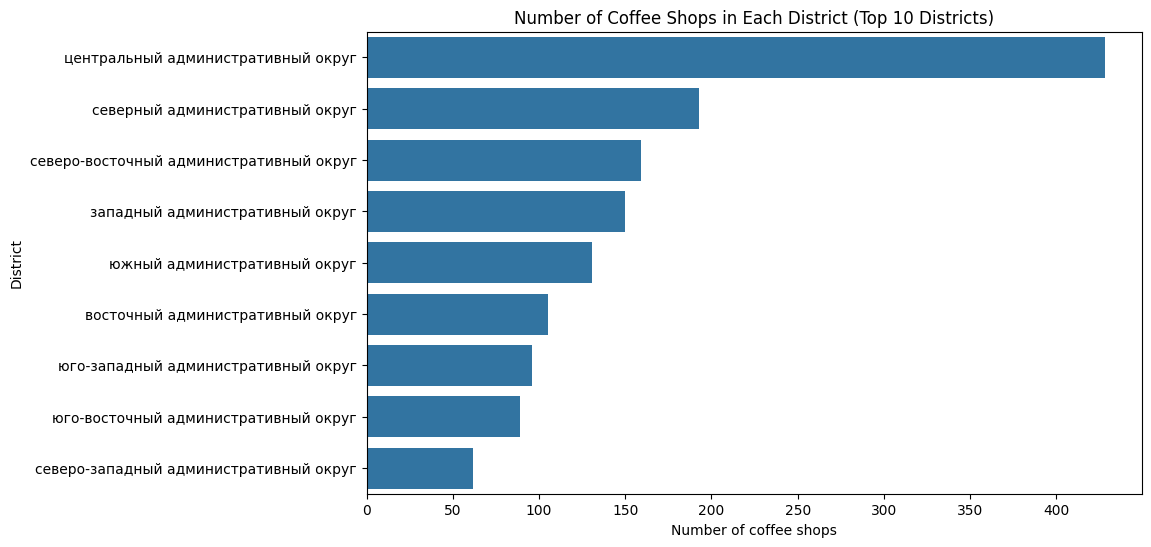

In [33]:
# Filter coffee shops from the dataset
coffee_shops = df[df['category'] == 'кофейня']

# Count the number of coffee shops
coffee_shops_count = coffee_shops.shape[0]
print(f'There are {coffee_shops_count} coffee shops in the dataset.')

# Count number of coffee shops in each district
coffee_shops_district = coffee_shops['district'].value_counts().reset_index()
coffee_shops_district.columns = ['District', 'Number of coffee shops']

# Display districts with the most coffee shops
top_coffee_shops_districts = coffee_shops_district[:10]
print(top_coffee_shops_districts)

# Plot a barplot of the number of coffee shops in each district (top 10 districts)
plt.figure(figsize=(10,6))
sns.barplot(x='Number of coffee shops', y='District', data=top_coffee_shops_districts)
plt.title('Number of Coffee Shops in Each District (Top 10 Districts)')
plt.show()

**Conclusions:**

In the given dataset, there are a total of 1413 coffee shops spread across different districts.

The Central Administrative District has the highest number of coffee shops with a count of 428, which is not surprising given that this is typically the busiest part of the city with high footfall, making it a good location for coffee shops.

Next on the list is the Northern Administrative District, which contains a considerably lesser but still significant count of 193 coffee shops.

The North-Eastern and Western Administrative Districts are not far behind with 159 and 150 coffee shops respectively.

The Southern, Eastern, South-Western, and South-Eastern Administrative Districts have a comparatively lower number of coffee shops with counts ranging from 89 to 131.

The fewest coffee shops are located in the North-Western Administrative District, with only 62.

From this data, we can deduce that Central and Northern Administrative Districts are potentially popular locations for coffee lovers. As a result, these areas might be more competitive for someone looking to open a new coffee shop. On the other hand, districts with fewer coffee shops might have unmet demand, presenting a potential opportunity. Further demographic information and customer preferences will help to draw more accurate conclusions.

**Consider 24-hour coffee shops.**

In [34]:
# Compute the values for the chart directly
values = [coffee_shops['is_24/7'].sum(), len(coffee_shops['is_24/7']) - coffee_shops['is_24/7'].sum()]

# Categories for the chart
category_name = ['24/7 coffee shops', 'Non 24/7 coffee shops']

# Generate pie chart
fig = go.Figure(data=[go.Pie(labels=category_name, values=values, hole=.3)])
fig.update_layout(title='Proportion of 24/7 and non 24/7 coffee shops')
fig.show()

**Conclusions:**

The data shows that about 4.18% of coffee shops operate around the clock (24/7), while the vast majority (95.8%) of coffee shops do not and presumably have fixed hours of operation.

Given these numbers, it can be inferred that there is limited availability of 24/7 coffee shops. This can be due to a number of factors, including local regulations, increased operational costs, or a lack of demand during late-night hours. It could also be due to the lifestyle and culture of the city residents.

However, this situation presents an opportunity for businesses looking to occupy a niche market. Should there be enough demand, opening a 24/7 coffee shop might appeal to customers like students, shift workers, night owls, or people looking for late-night hangout spots, given the low competition in this space. 

**Let's see how the average rating of coffee shops is distributed.**

                                  district  rating
5       центральный административный округ    4.34
4   северо-западный административный округ    4.33
2          северный административный округ    4.29
7      юго-западный административный округ    4.28
0         восточный административный округ    4.28
8             южный административный округ    4.23
6     юго-восточный административный округ    4.23
3  северо-восточный административный округ    4.22
1          западный административный округ    4.20


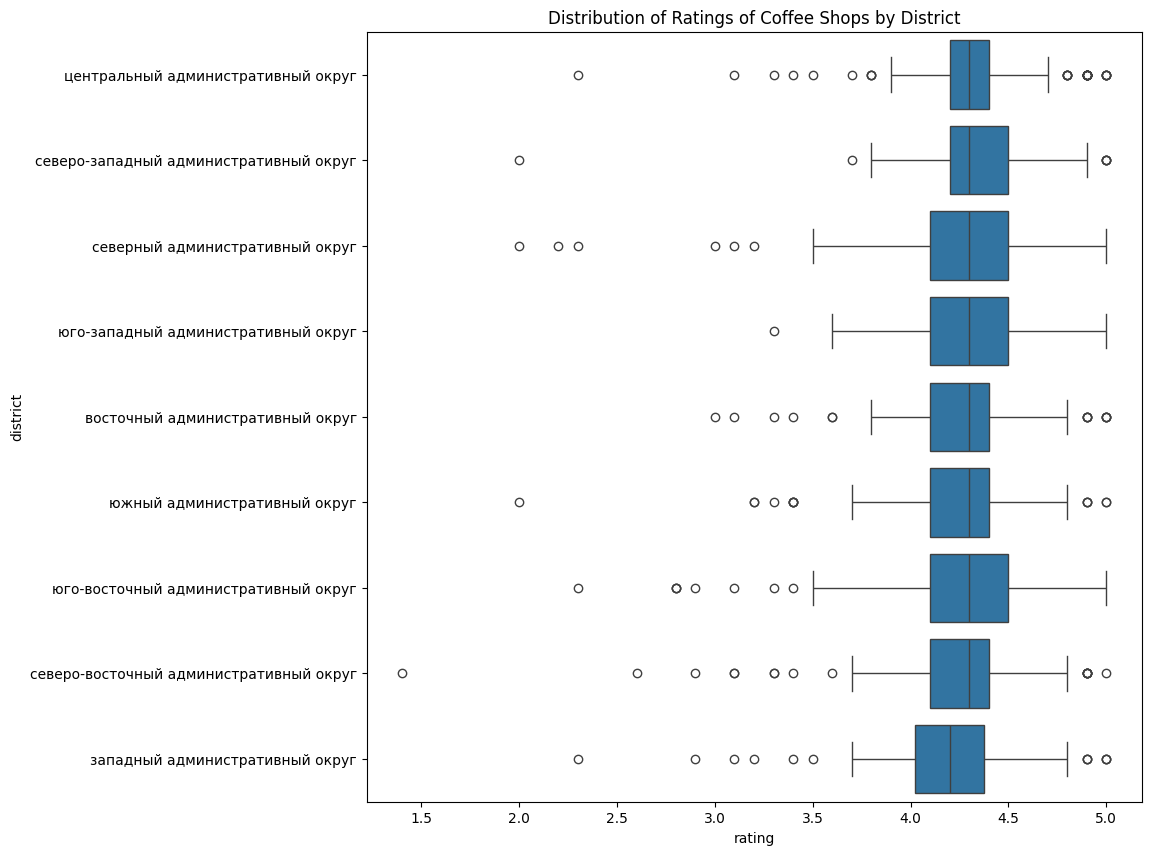

In [35]:
# Calculate the average rating of coffee shops in each district
district_ratings = coffee_shops.groupby('district')['rating'].mean().reset_index()

# Sort districts by average rating in descending order
district_ratings = district_ratings.sort_values('rating', ascending=False)

# Print the district ratings
print(district_ratings)

# Plot distributions of coffee shops' ratings in each district
plt.figure(figsize=(10, 10))
sns.boxplot(x='rating', y='district', data=coffee_shops, order=district_ratings['district'])
plt.title('Distribution of Ratings of Coffee Shops by District')
plt.show()

**Conclusions:**

The results show the average ratings of coffee shops for each neighborhood district.

The Central Administrative District leads the list with the highest average rating of 4.34. Given its central location in the city with high footfall, the quality of services offered by these coffee shops is expected to be high, reflecting in their ratings.

The North-Western Administrative District also boasts a high average rating of 4.33, indicating a high level of satisfaction among customers who visit coffee shops in this area.

The Northern, South-Western, and Eastern Administrative Districts follow next, all with average ratings above 4.

The Southern and South-Eastern Administrative Districts come next with average ratings slightly over 4.

The North-Eastern Administrative District and Western Administrative District have the lowest average ratings of 4.22 and 4.2 respectively. However, it's worth noting that these ratings are still relatively high, suggesting that even the lowest-rated districts have good quality coffee shops.

**Let's determine what the cost of a cup of cappuccino should be focused on when opening a coffee shop.**

In [36]:
# Filter out records where cost of a coffee cup is zero
coffee_shops = df[(df['category'] == 'кофейня') & (df['middle_coffee_cup'] != 0)]

# Compute the mean cost
mean_cost = coffee_shops['middle_coffee_cup'].mean()

print("The average cost of a cup of cappuccino is", mean_cost.round())

The average cost of a cup of cappuccino is 175.0


**Conclusions:**

The average cost of a cup of cappuccino at coffee shops (that have a listed price) is approximately 175 rub. 

This price could be influenced by various factors such as the costs of raw materials (coffee beans, milk), operational costs (rent, salaries, utilities, etc.), the targeted profit margins, and the general market prices in the area (derived from what the consumers are willing to pay).

In [37]:
# Filter data and aggregate it in a single step
df_agg = (df[df['middle_coffee_cup'] != 0].groupby('district')['middle_coffee_cup']
          .agg(['median', 'min', 'max'])
          .sort_values(by='median', ascending=False)
          .reset_index())

# Create a map
m = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# Add a Choropleth layer to the map
folium.Choropleth(
    geo_data=geo_json,
    data=df_agg,
    columns=['district', 'median'],
    key_on='feature.name',
    fill_color='BuGn',
    fill_opacity=0.8,
    legend_name='Average price of a cappuccino cup',
).add_to(m)

# Display the map
m

In [38]:
df_agg 

district  median   min      max
0      юго-западный административный округ  197.00 95.00   291.00
1       центральный административный округ  190.00 60.00   328.00
2          западный административный округ  187.00 60.00   300.00
3  северо-восточный административный округ  162.50 60.00   297.00
4          северный административный округ  159.00 60.00   325.00
5   северо-западный административный округ  150.00 60.00   270.00
6             южный административный округ  149.50 60.00   275.00
7     юго-восточный административный округ  145.00 60.00   375.00
8         восточный административный округ  135.00 60.00 1,568.00

**Conclusions:**

Based on the given data, we notice a substantial variation in the price of a cup of coffee across different administrative districts:

The South-Western Administrative District has the highest median price for a cup of coffee at 197 units with the price ranging from 95 to 291 units.

This is followed by the Central Administrative District with a median price of 190 units.

Interestingly, the price variation in this district is larger, from 60 units to 328 units.

The Western Administrative District has a similar median price to the Central District at 187 units, with prices ranging from 60 to 300 units.

There is a noticeable drop when we move to the North-Eastern Administrative District, where the median price falls to 162.50 units, despite a slightly higher maximum price of 297 units.

The Northern, North-Western, Southern, and South-Eastern Administrative Districts all have median prices ranging from 145 to 159 units, suggesting a comparativley lower average price for coffee across these districts.

The Eastern Administrative District has the lowest median cost of 135 units. However, it also has the largest variation in prices, with the maximum price reaching as high as 1568 units.

Overall, this information illustrates the diversity of pricing and potential spending power across the different districts. 

**A conclusion on the optimal price of a cup of coffee:**

Determining the optimal price for a cup of cappuccino when opening a new coffee shop would depend on multiple factors including the specific location (district), market segment you are targeting (high-end, middle, budget), cost factors (rent, ingredients, labor, etc.), and the competitive environment.

From the data we have:

In high-end districts like the South-Western or Central Administrative District, the average cappuccino price is about 190-197 units, so entering with a price in this range or slightly higher might be acceptable.

In districts with more moderate pricing like the Eastern Administrative District, a cost around 135 units might be more appropriate.

It's also essential to observe the price ranges in our data. Even in districts with lower median prices, there are coffee shops charging high prices and ideally, they are offering superior service, ambience, or coffee quality. If you plan to elevate the coffee experience, pricing above the median could make sense.

Conversely, there may be an opportunity to cater to more price-sensitive coffee drinkers with a lower-priced offering, particularly in districts where there's a large spread in prices.

**Overall conclusion of the section:**

The analysis reveals that the Central and Northern Administrative districts have the highest concentration of coffee shops, implying high competition but also potentially high demand. Conversely, districts with fewer coffee shops may contain untapped markets. Most coffee shops do not operate 24/7, presenting a niche opportunity for late-night service. The Central and North-Western Administrative Districts enjoy the highest ratings, demonstrating good customer satisfaction. The average cost of a cappuccino is around 175 rubles, but prices vary, particularly in the Eastern Administrative district where fluctuations are highest. When setting coffee prices, a new shop should consider local averages as well as its unique offerings and the surrounding competition. Overall, these findings present different factors to consider when strategizing for a new coffee shop in these districts.


<a id="num7"></a>
## 5. General conclusions

**Data preprocessing was performed.**

1. duplicates were removed;
2. Gaps in the stems were replaced;
3. Created `street` column with street names from the address column;
4. An `is_24/7` column has been created to indicate that the establishment is open daily and around the clock (24/7);
5. Brought the dataframe values to lower case.
6. Removed the abnormal values (1,2%). 

**Conclusions from Section 3 Exploratory analysis of the data:**

The data insights provide a breakdown of the catering industry in Moscow. Cafés, restaurants, and coffee shops are the most common types of establishments. Non-chain establishments outnumber chain establishments. The Central Administrative District is the most populous area for these businesses, especially cafés and restaurants. Despite bars and pubs presenting the highest ratings, all establishments generally provide satisfactory service, with a median rating above four. The Central Administrative District also has the highest average rating among the districts but exhibits the highest median bill value. This suggests the district caters to a higher-spending clientele or is a central business hub. 

**Conclusions to Section 4 Detailed research: opening a coffee shop**

The analysis reveals that the Central and Northern Administrative districts have the highest concentration of coffee shops, implying high competition but also potentially high demand. Conversely, districts with fewer coffee shops may contain untapped markets. Most coffee shops do not operate 24/7, presenting a niche opportunity for late-night service. The Central and North-Western Administrative Districts enjoy the highest ratings, demonstrating good customer satisfaction. The average cost of a cappuccino is around 175 rubles, but prices vary, particularly in the Eastern Administrative district where fluctuations are highest. When setting coffee prices, a new shop should consider local averages as well as its unique offerings and the surrounding competition. Overall, these findings present different factors to consider when strategizing for a new coffee shop in these districts.

**General guidelines for opening a coffee shop:**

1. You can focus on the median price of a cup of cappuccino, depending on the neighborhood in which they want to open a coffee shop.    
2. It is better to open a coffee shop in neighborhoods where there are not many. In the western, southern or eastern districts of Moscow.    
3. It is better to choose the opening of coffee on the street where there are no more than 2-3 establishments of catering.    
4. The street should be located not far from the subway / public places / central streets with good traffic.    
5. If this coffee shop is the only one on the street you can increase the average cost of a cup of cappuccino by 5%